In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas_profiling

In [16]:
#Data Loading and Exploration
train = pd.read_csv("C:\\Users\\hp\\Downloads\\COVID-19 Coronavirus.csv",header=None)

In [17]:
train.head()

,0,1,2,3,4,5,6,7,8,9
0,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
1,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743132
2,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275057509
3,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587215976
4,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382270638


In [21]:
train.rename(columns={0:'Country', 
                      1:'Other Names',
                      2:'ISO',
                      3:'Population',
                      4:'Continent',
                      5:'Total Cases',
                      6:'Total Deaths',
                      7:'TC1Mpop',
                      8:'TD1Mpop',
                      9:'Death Percentage'},inplace=True)

In [24]:
train.dropna(inplace=True)

In [26]:
train['Population']=train['Population'].map(int)
train['Total Cases']=train['Total Cases'].map(int)
train['Total Deaths']=train['Total Deaths'].map(int)
train['TC1Mpop']=train['TC1Mpop'].map(int)
train['TD1Mpop']=train['TD1Mpop'].map(int)
train['Death Percentage']=train['Death Percentage'].map(float)

In [28]:
train.isnull().sum()

Country             0
Other Names         0
ISO                 0
Population          0
Continent           0
Total Cases         0
Total Deaths        0
TC1Mpop             0
TD1Mpop             0
Death Percentage    0
dtype: int64

In [29]:
train.duplicated().sum()

0

In [30]:
train

,Country,Other Names,ISO,Population,Continent,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death Percentage
1,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
2,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
3,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
4,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
5,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
...,...,...,...,...,...,...,...,...,...,...
221,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850
222,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
223,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
224,Zambia,Zambia,ZMB,19284482,Africa,317076,3967,16442,206,1.251120


In [32]:
#remove the signs of other names, ISO due to duplication of information

train=train.drop(['Other Names', 'ISO'],axis=1)

In [33]:
#the statistics of the dataset
train.describe()

,Population,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death Percentage
count,2.240000e+02,2.240000e+02,2.240000e+02,224.000000,224.000000,224.000000
mean,3.522698e+07,2.193493e+06,2.755859e+04,135853.424107,1082.388393,1.445396
std,1.395346e+08,7.291057e+06,9.709457e+04,144530.738201,1178.878583,1.745524
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.642188e+05,2.379425e+04,1.885000e+02,11316.750000,120.250000,0.510193
50%,5.879399e+06,1.627530e+05,1.946000e+03,88662.000000,683.000000,1.027844
75%,2.240245e+07,1.092659e+06,1.367375e+04,221988.750000,1766.500000,1.980332
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


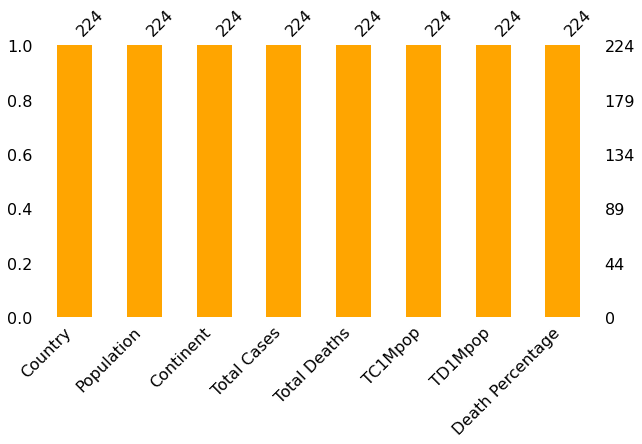

In [57]:
#the amount of missing data in the dataset
msno.bar(train, figsize=(10,5), color='orange')
plt.show()

In [47]:
train.isnull().sum()
    

Country             0
Population          0
Continent           0
Total Cases         0
Total Deaths        0
TC1Mpop             0
TD1Mpop             0
Death Percentage    0
dtype: int64

In [48]:
train.columns

Index(['Country', 'Population', 'Continent', 'Total Cases', 'Total Deaths',
       'TC1Mpop', 'TD1Mpop', 'Death Percentage'],
      dtype='object')

In [53]:
columns=['Population', 'Total Cases', 'Total Deaths',
       'TC1Mpop', 'TD1Mpop', 'Death Percentage']

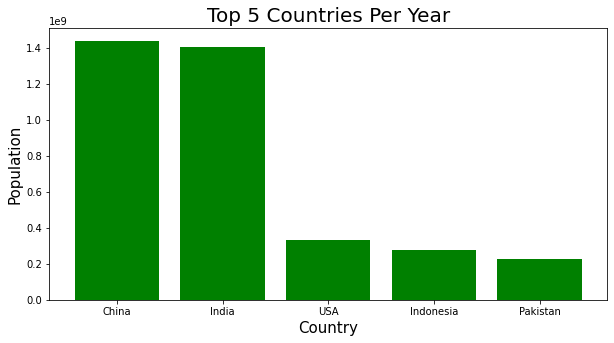

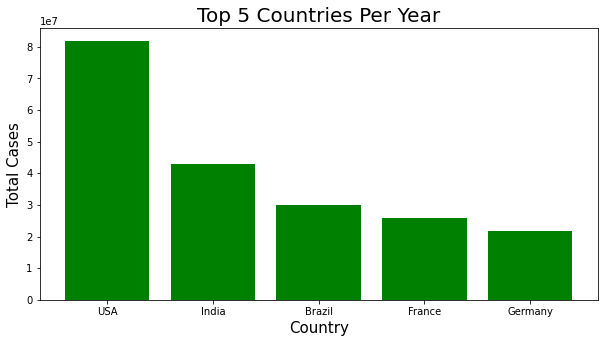

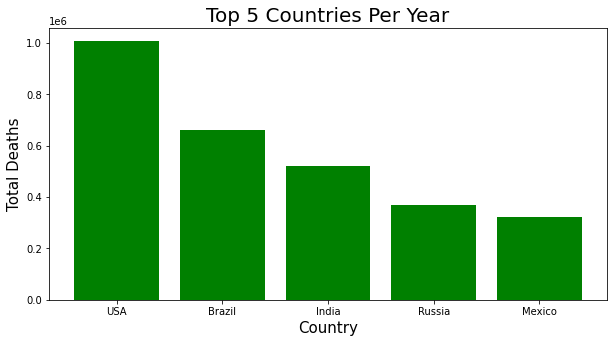

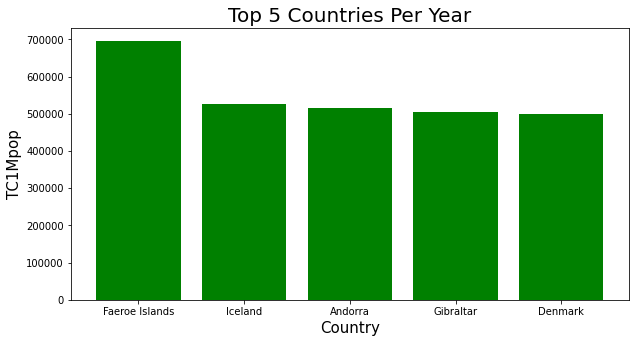

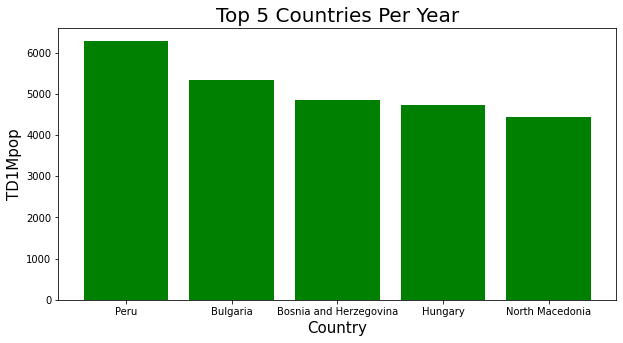

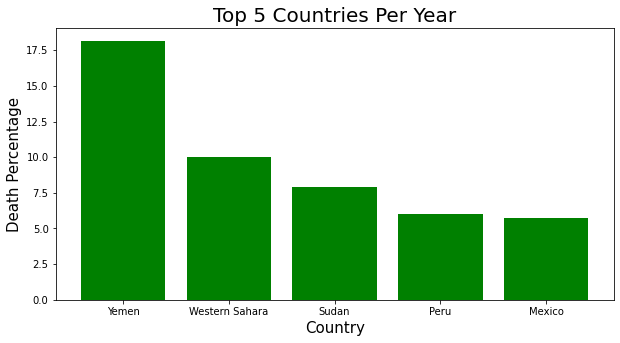

In [66]:
#Anti-rating in the fight against covid

for column in columns:

    top5 = train.nlargest(5,column)
    plt.figure(figsize=(10,5))
    plt.bar(top5['Country'], top5[column],color='Green',alpha=1)
    plt.ylabel(column, fontsize = 15)
    plt.xlabel("Country", fontsize = 15)
    plt.title("Top 5 Countries Per Year", fontsize = 20)
    plt.show()


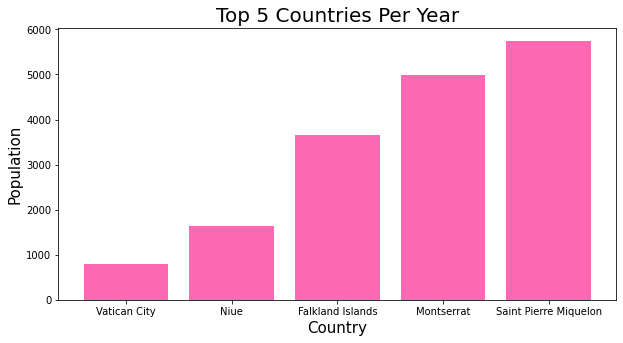

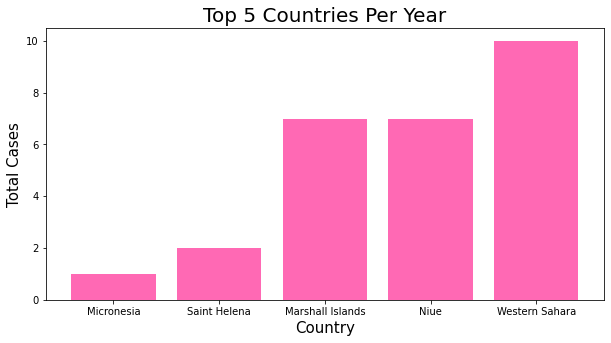

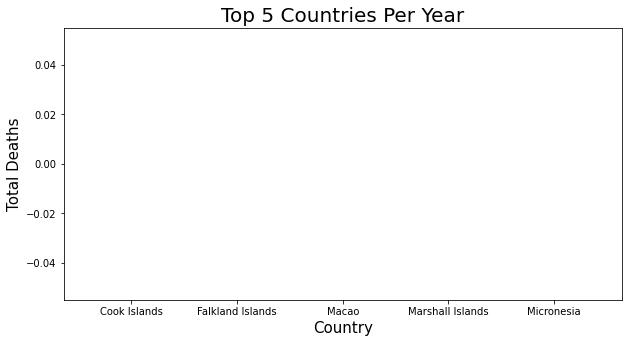

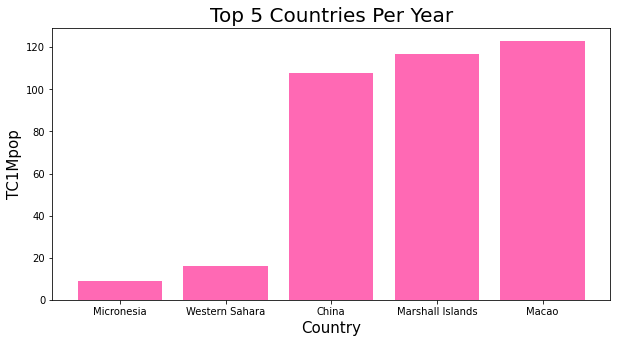

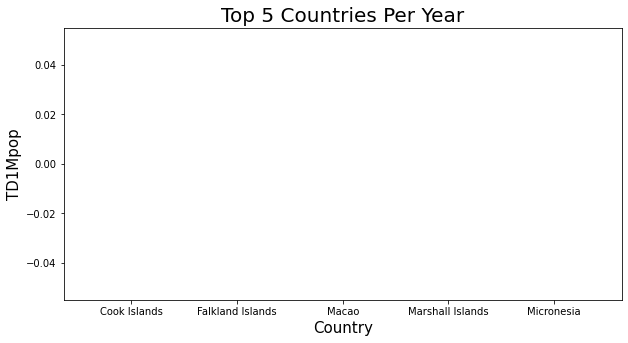

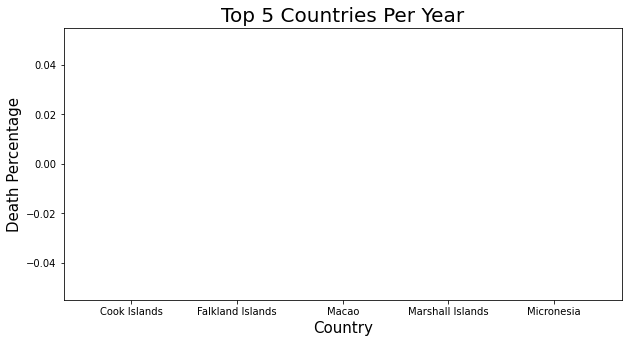

In [65]:
#countries less affected by this insidious disease

for column in columns:

    top5 = train.nsmallest(5,column)
    plt.figure(figsize=(10,5))
    plt.bar(top5['Country'], top5[column],color='hotpink',alpha=1)
    plt.ylabel(column, fontsize = 15)
    plt.xlabel("Country", fontsize = 15)
    plt.title("Top 5 Countries Per Year", fontsize = 20)
    plt.show()
